In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
musk_csv = pd.read_csv('musk_csv.csv')

EDA:-

In [3]:
print (musk_csv.shape)
print (musk_csv.columns)
musk_csv.head(5)

(6598, 170)
Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
print(musk_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB
None


In [5]:
musk_csv["class"].value_counts()

0    5581
1    1017
Name: class, dtype: int64

1. Out of 6598, 5581 belongs to class 0 and only 1017 to 1, looks like unbalanced dataset

In [6]:
musk_csv.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [7]:
#checking if any value is missing
musk_csv.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [8]:
#using pandas profiling for reverse EDA---this did not worked with this dataset, also did not had
#much time so did not check much what was going wrong.

# profile = ProfileReport(musk_csv, title="Pandas Profiling Report")
# print("abc")
# profile.to_widgets() 

Removing column having correlation>0.9

In [9]:
#ref: https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

corr_matrix = musk_csv.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
#to_drop = [column for column in corr.abs().columns if any(corr.abs()[column] > 0.90)]

In [10]:
musk_data = musk_csv.drop(columns = to_drop)

In [11]:
musk_data.shape

(6598, 111)

In [12]:
#splitting train and test data
train,test = train_test_split(musk_data, random_state=30, test_size = 0.2)
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((5278, 107), (1320, 107), (5278, 1), (1320, 1))

Training Model:-

In [13]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

adding dummy row with value 1 to make 107 to some 108(even),this would help us to re-shape the data.

In [14]:
a=[1]*Xtrain.shape[0]
Xtrain["dummy"]=a
print(Xtrain.shape)


b=[1]*Xtest.shape[0]
Xtest["dummy"]=b
print(Xtest.shape)

(5278, 108)
(1320, 108)


In [15]:
#reshape the above training and test data.
x_train=Xtrain.values.reshape(Xtrain.shape[0],18,6,1)
x_test=Xtest.values.reshape(Xtest.shape[0],18,6,1)

In [16]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(18,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [18]:
predt = model.fit(x_train,Ytrain,batch_size=128,epochs=20,validation_data=(x_test,Ytest))
score=model.evaluate(x_test,Ytest,verbose=0)
print(score)

Epoch 1/20
42/42 [==============================] - 0s 11ms/step - loss: 2.4764 - accuracy: 0.8143 - val_loss: 0.2313 - val_accuracy: 0.9045
Epoch 2/20
42/42 [==============================] - 0s 9ms/step - loss: 0.3368 - accuracy: 0.8829 - val_loss: 0.1735 - val_accuracy: 0.9333
Epoch 3/20
42/42 [==============================] - 0s 8ms/step - loss: 0.2264 - accuracy: 0.9119 - val_loss: 0.1444 - val_accuracy: 0.9417
Epoch 4/20
42/42 [==============================] - 0s 9ms/step - loss: 0.1785 - accuracy: 0.9297 - val_loss: 0.1286 - val_accuracy: 0.9492
Epoch 5/20
42/42 [==============================] - 0s 8ms/step - loss: 0.1527 - accuracy: 0.9379 - val_loss: 0.1191 - val_accuracy: 0.9523
Epoch 6/20
42/42 [==============================] - 0s 8ms/step - loss: 0.1370 - accuracy: 0.9415 - val_loss: 0.1082 - val_accuracy: 0.9576
Epoch 7/20
42/42 [==============================] - 0s 8ms/step - loss: 0.1291 - accuracy: 0.9487 - val_loss: 0.1001 - val_accuracy: 0.9606
Epoch 8/20
42/42 [=

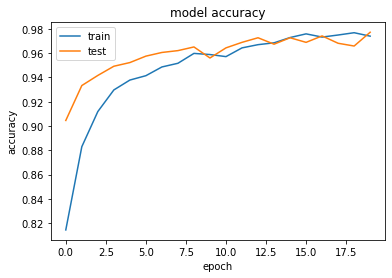

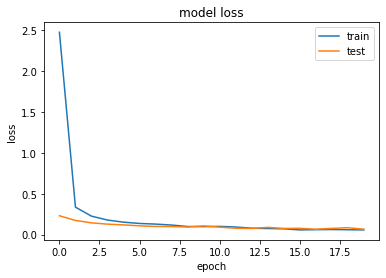

In [19]:
#accuracy
plt.plot(predt.history['accuracy'])
plt.plot(predt.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(predt.history['loss'])
plt.plot(predt.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [20]:
print("f1_score:",f1_score(Ytest,model.predict_classes(x_test),))
print("recall:",recall_score(Ytest,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
f1_score: 0.9210526315789473
recall: 0.9067357512953368
Validation Loss: 0.06698134541511536
Validation Accuracy: 0.9772727489471436


In [21]:
model.save('model2.h5')